### Загрузим датасет

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### 1. Предобработка данных

##### 1.1 Познакомимся с данными

In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### 1.2 Уберем пропуски и дубликаты

In [9]:
df = df.drop_duplicates() # уберем дупликаты

In [10]:
df.isna().sum() # проверим на пропуски

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
df = df.dropna() # уберем строки с пропусками, если их мало
df = df.dropna(axis=1) # уберем колонки с пропусками (how='any' по умолчанию)

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # или median, most_frequent, constant
imputer.fit(df)  # обучаем на одной колонке, но можно и на всех сразу
df = pd.DataFrame(imputer.transform(df), columns=df.columns)  # применяем к колонке

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance') # отнормировать перед применением
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

##### 1.3 Предварительный анализ

Посмотрим сбалансированность классов.

In [14]:
import matplotlib.pyplot as plt

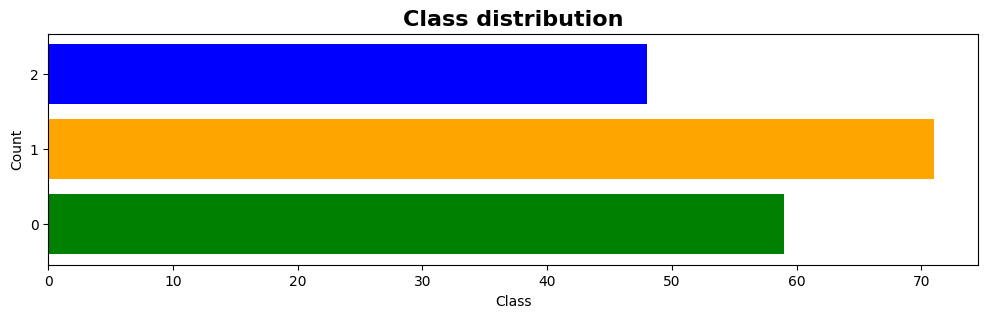

In [15]:
counts = pd.DataFrame(df['target'].value_counts())

plt.figure(figsize=(12, 3))
plt.barh(y=counts.index, width=counts['count'], color=['orange', 'green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.yticks([0, 1, 2])
plt.title('Class distribution', fontweight='bold', fontsize=16)
plt.show()

Отношения признаков.

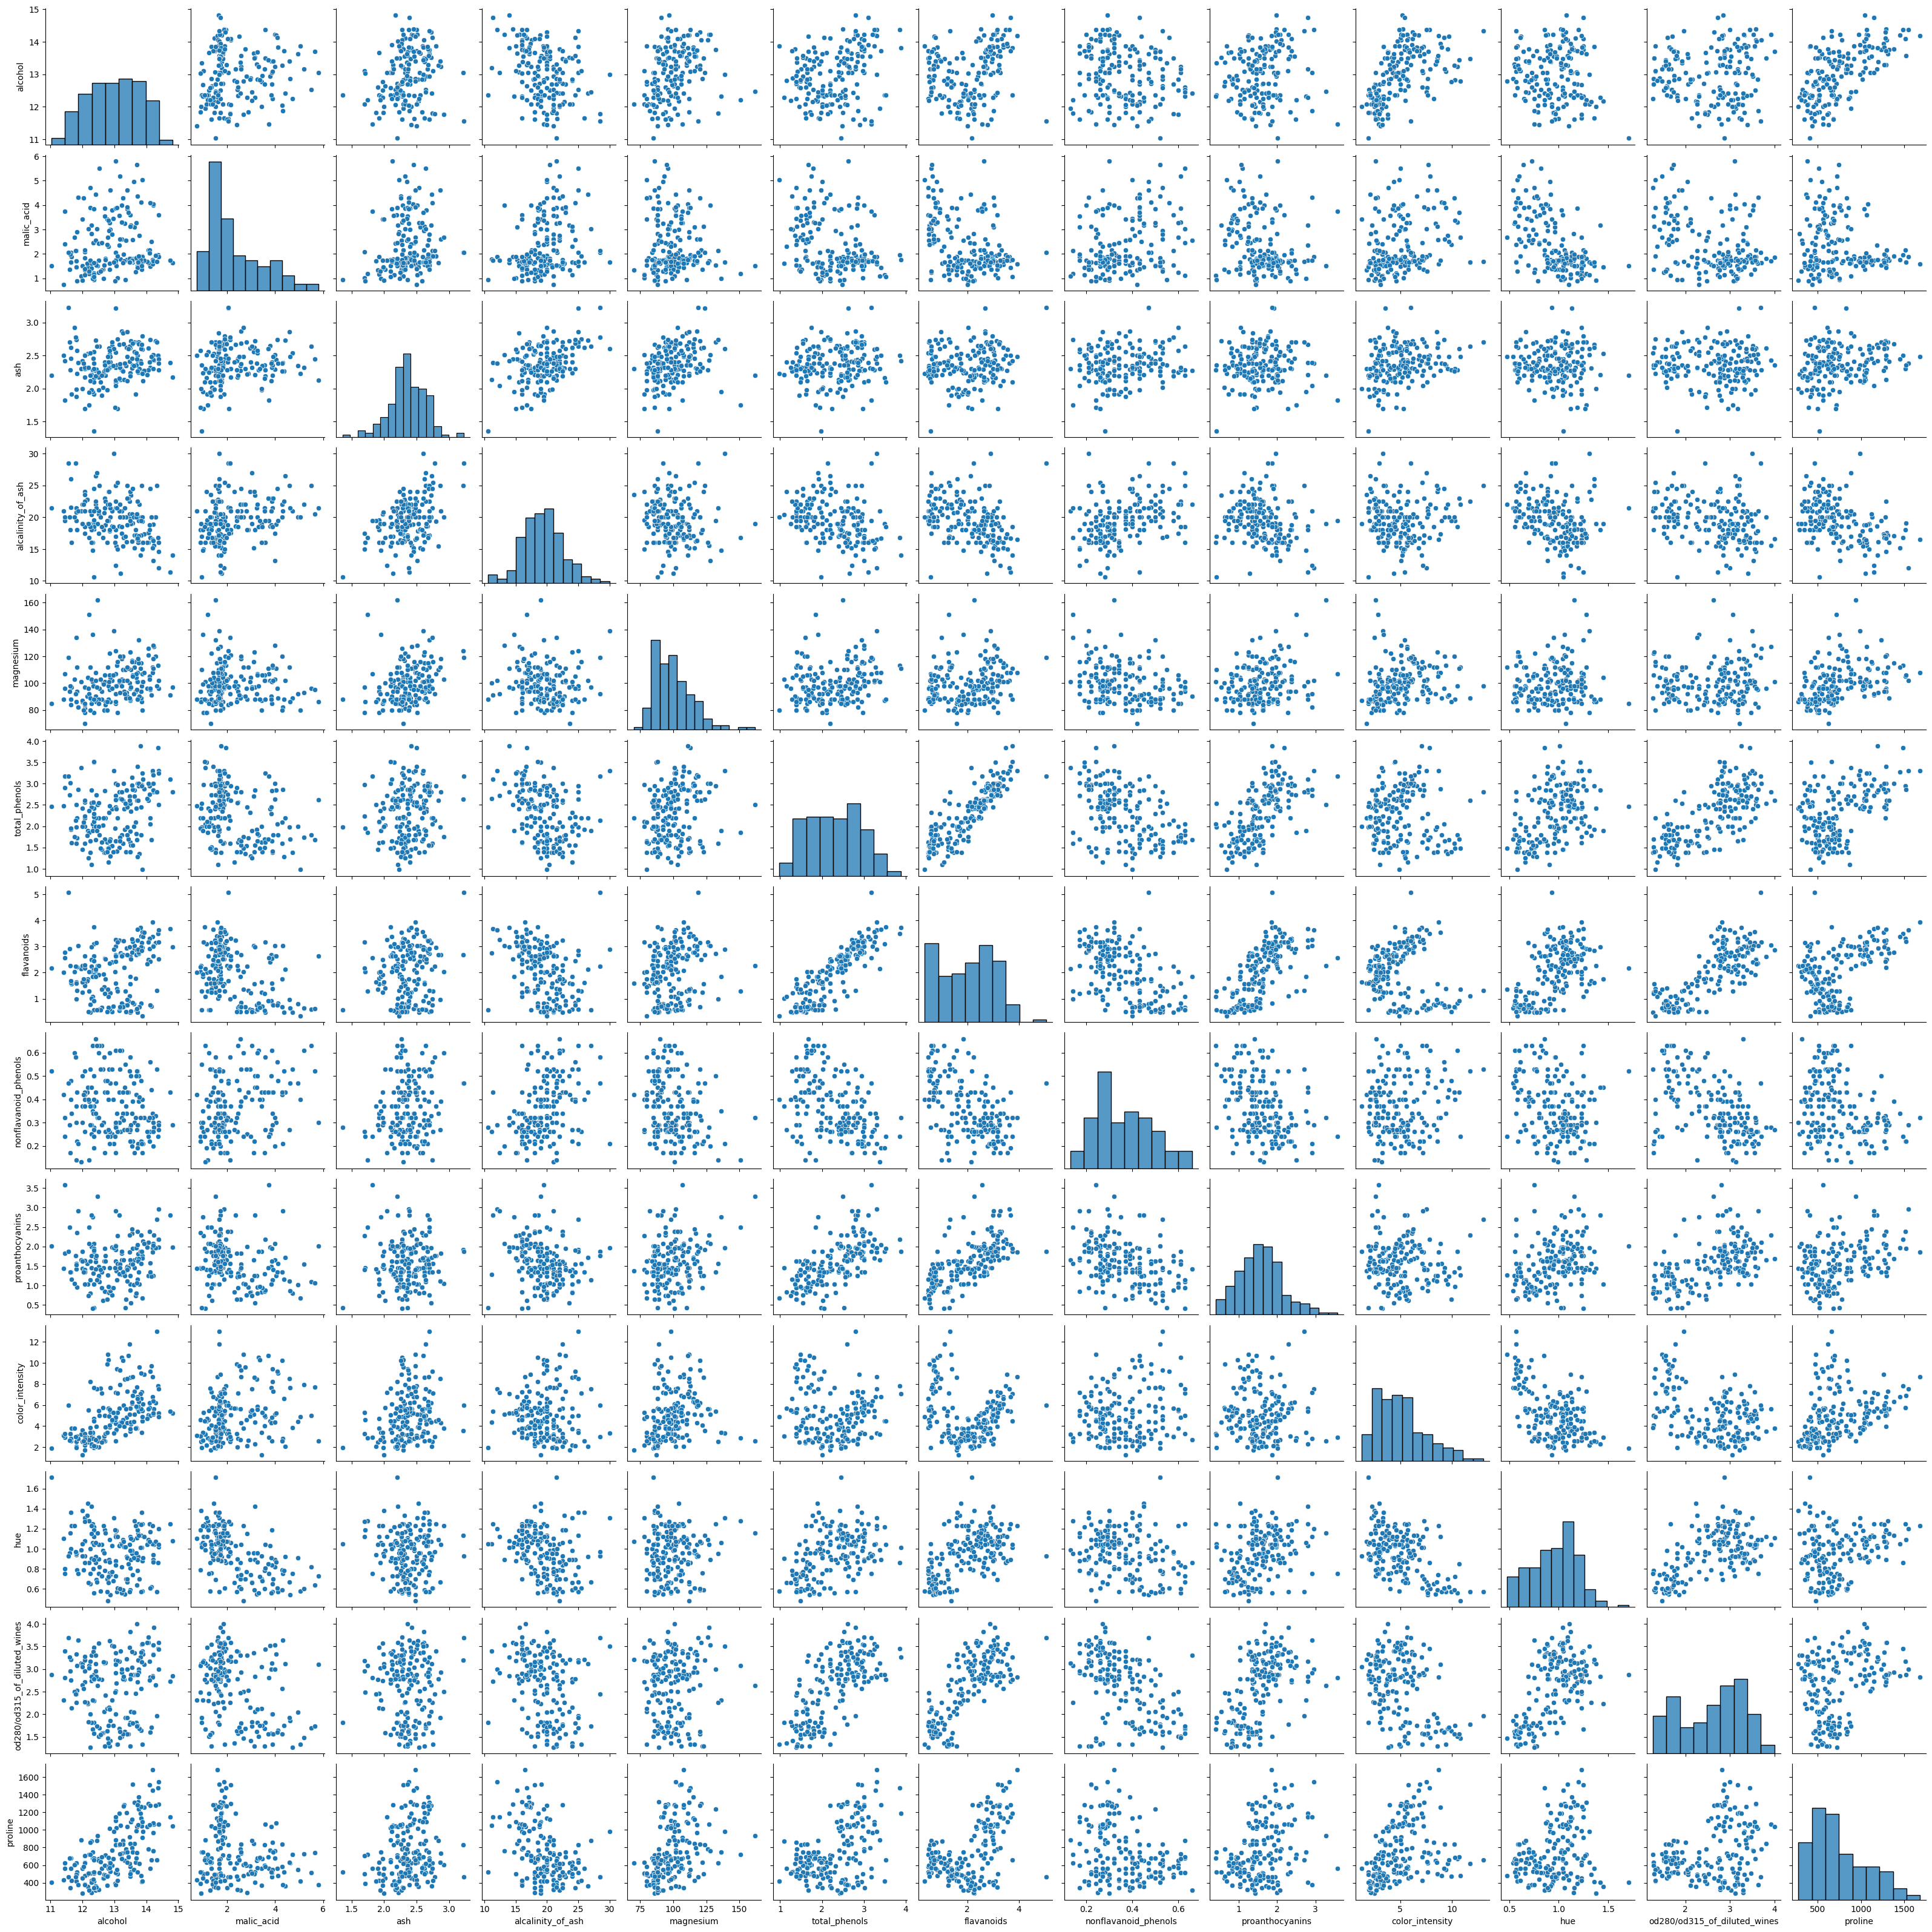

In [16]:
import seaborn as sns
sns.pairplot(df.drop('target', axis=1))
plt.show()

Распределение признаков.

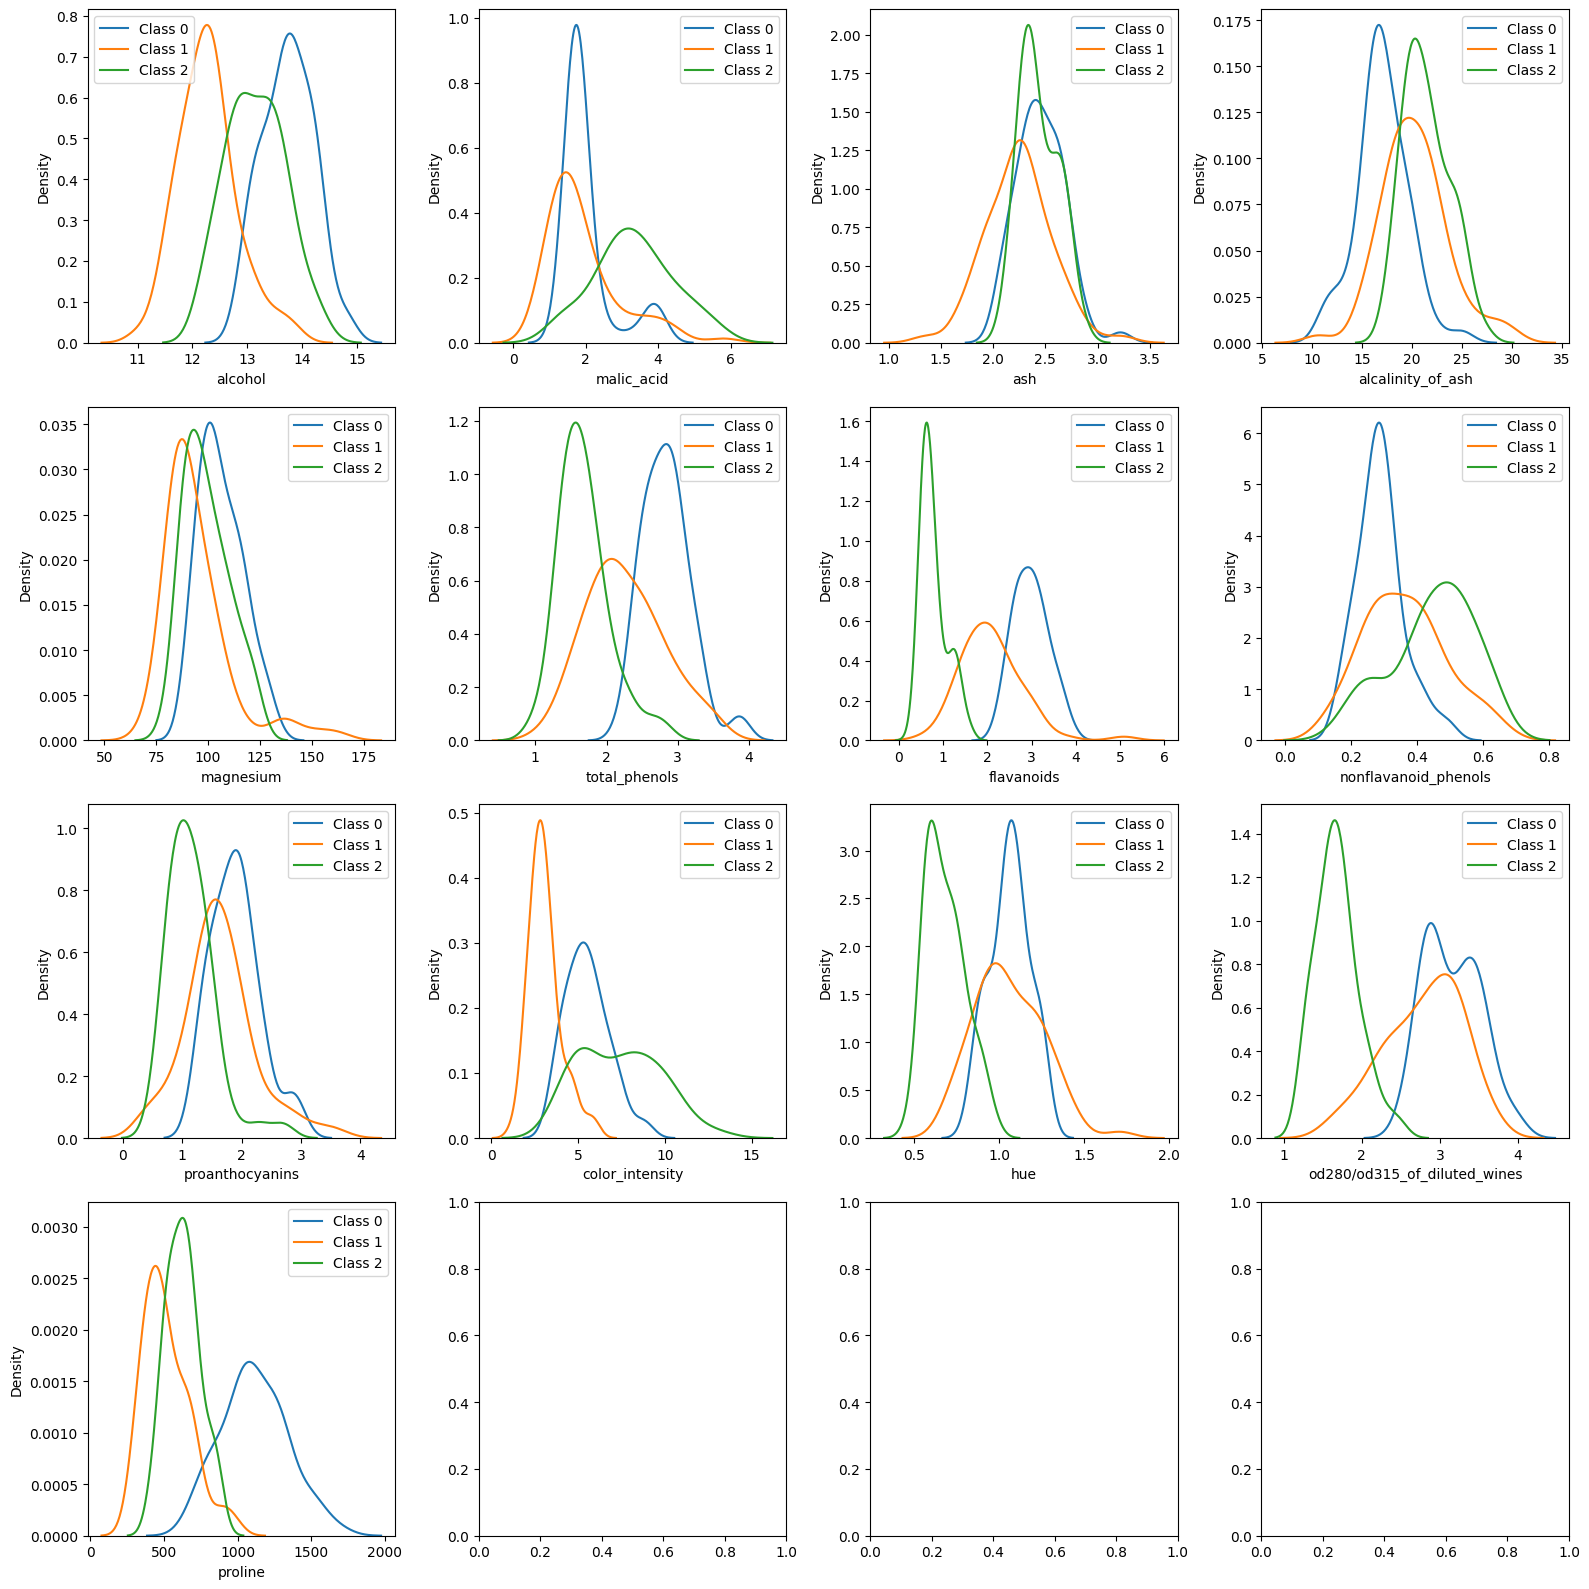

In [17]:
features = df.drop('target', axis=1).columns
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for f, ax in zip(features, axes.flatten()):
    sns.kdeplot(df[df['target'] == 0][f], label='Class 0', ax=ax)
    sns.kdeplot(df[df['target'] == 1][f], label='Class 1', ax=ax)
    sns.kdeplot(df[df['target'] == 2][f], label='Class 2', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

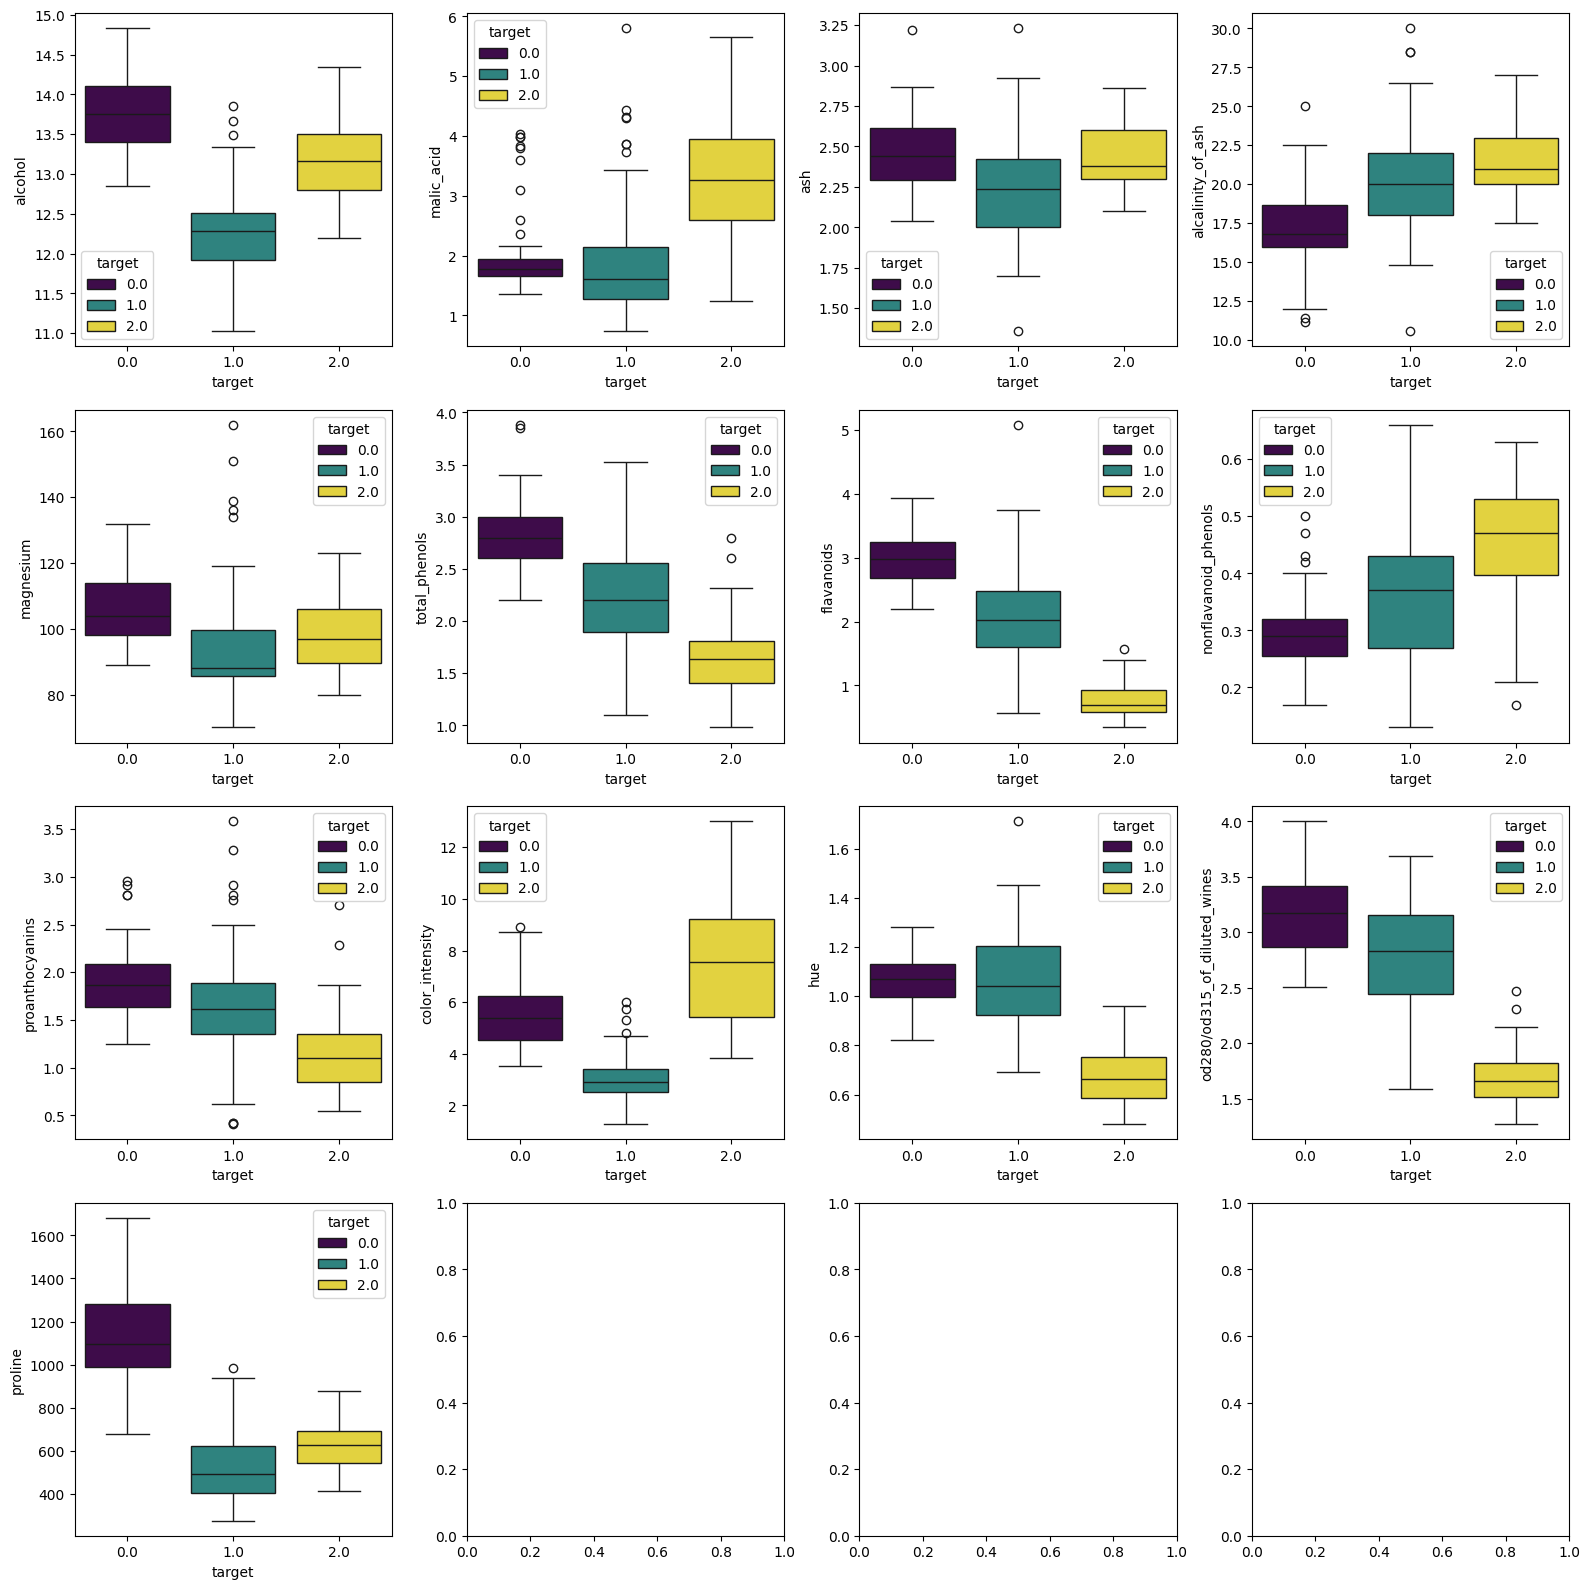

In [18]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for f, ax in zip(df.columns[:-1], axes.flatten()):
    sns.boxplot(data=df, x='target', y=f, palette='viridis', ax=ax, hue='target')
plt.tight_layout()
plt.show()

Корреляции

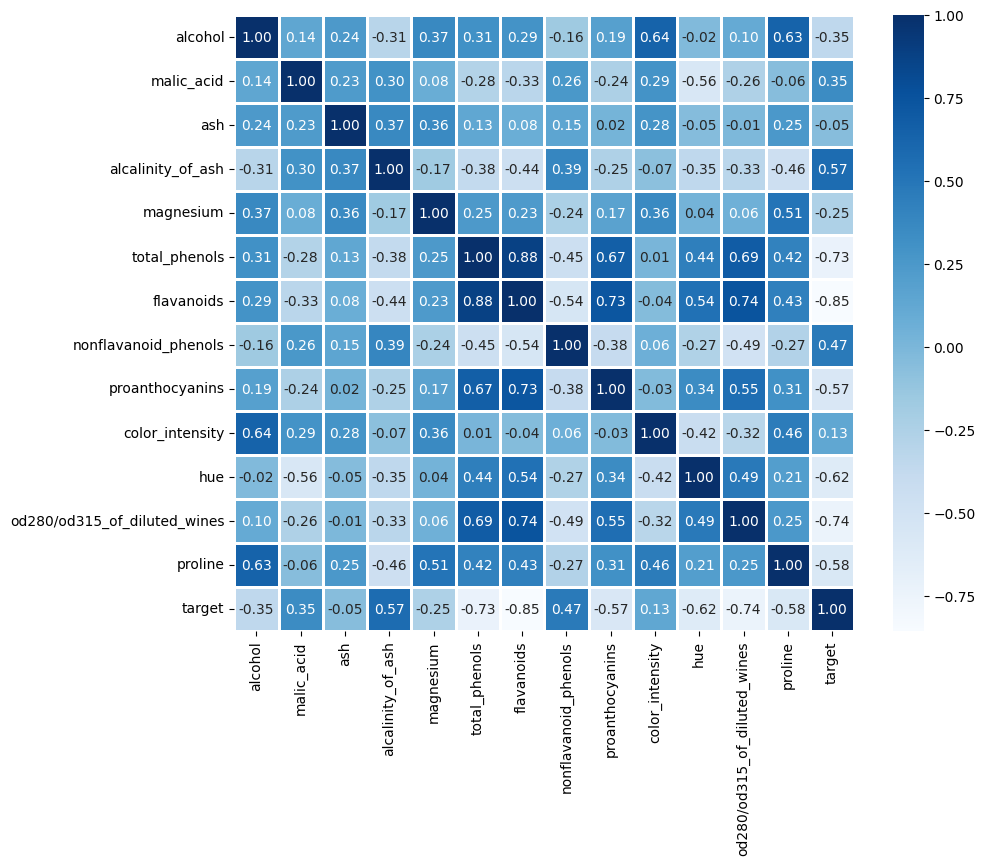

In [19]:
from matplotlib import colormaps # значения для cmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.show()

#### 2. Обработка данных.

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

Отскалируем данные.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_train.columns] = scaler.transform(X_test)

#### 3. KNNClassifier

Кросс валидация для подбора гиперпарметров

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : np.arange(1, 50, 2),
    'metric' : ['euclidean', 'manhattan', 'cityblock'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance']
}

knn = KNeighborsClassifier(n_jobs=1)
search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring='accuracy')
search.fit(X_train, y_train)
search.best_params_

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': np.int64(9),
 'weights': 'uniform'}

In [23]:
knn = KNeighborsClassifier(**search.best_params_).fit(X_train, y_train)

In [24]:
from sklearn.metrics import accuracy_score

print(f'Accuracy train {accuracy_score(y_train, knn.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, knn.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.9444444444444444


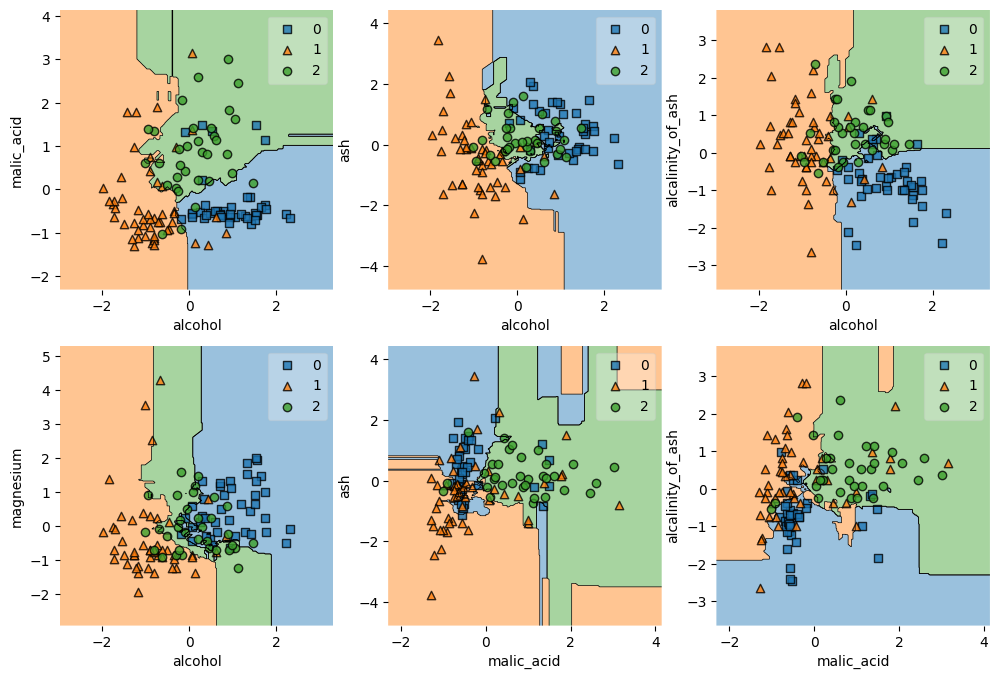

In [25]:
from mlxtend.plotting import plot_decision_regions

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
features = []
for f1 in range(len(X_train.columns) - 8):
    for f2 in range(f1 + 1, len(X_train.columns) - 8):
        features.append((X_train.columns[f1], X_train.columns[f2]))

for f, ax in zip(features, axes.flatten()):
    plot_decision_regions(np.array(X_train[[f[0], f[1]]]), np.array(y_train, dtype=int), KNeighborsClassifier(**search.best_params_).fit(np.array(X_train[[f[0], f[1]]]), y_train), ax=ax, n_jobs=-1)
    ax.set_xlabel(f[0])
    ax.set_ylabel(f[1])

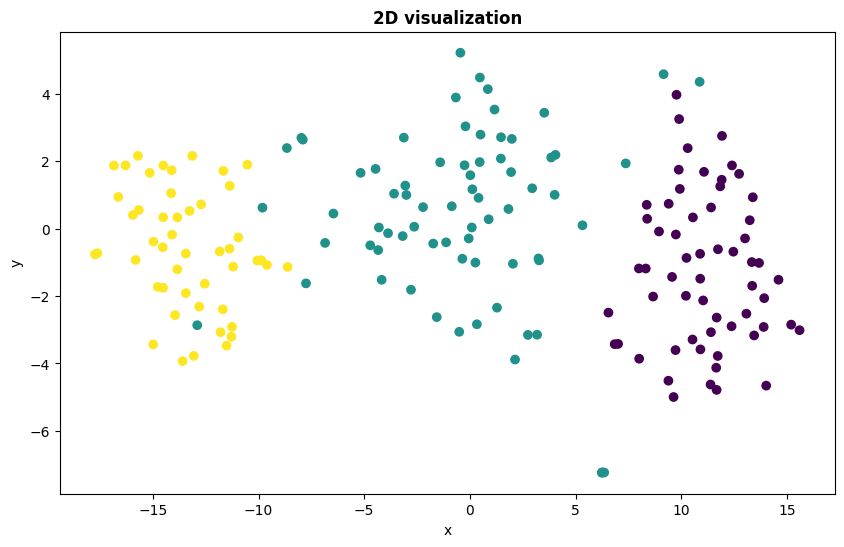

In [26]:
from sklearn.manifold import TSNE

df_2d = TSNE(n_components=2, n_jobs=-1, early_exaggeration=5, perplexity=30).fit_transform(pd.concat([X_train, X_test], ignore_index=True))

plt.figure(figsize=(10, 6))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=pd.concat((y_train, y_test)))
plt.title('2D visualization', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
import plotly.express as px

df_3d = TSNE(n_components=3, n_jobs=-1, random_state=1233).fit_transform(pd.concat([X_train, X_test], ignore_index=True))
px.scatter_3d(x=df_3d[:, 0], y=df_3d[:, 1], z=df_3d[:, 2], color=pd.concat((y_train, y_test))).show()

#### 4. Логистическая регрессия

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [29]:
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, scoring=None).fit(X_train, y_train)

In [30]:
log_reg = LogisticRegression(penalty='l2', C=log_reg_cv.C_[0], n_jobs=-1).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, log_reg.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, log_reg.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 5. RidgeClassiffier

In [31]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier

In [32]:
ridge_cv = RidgeClassifierCV(alphas=np.arange(0.01, 10, 0.1), cv=5).fit(X_train, y_train)

In [33]:
ridge = RidgeClassifier(alpha=ridge_cv.alpha_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, ridge.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, ridge.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 6. SVM Classifier

In [34]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'C' : np.arange(0.1, 10, 0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)
search.best_params_

{'C': np.float64(0.2), 'gamma': 'scale', 'kernel': 'sigmoid'}

In [35]:
svc = SVC(**search.best_params_).fit(X_train, y_train)

print(f'Accuracy train {accuracy_score(y_train, svc.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, svc.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.9814814814814815


#### 7. Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth' : np.arange(2, 7),
    'min_samples_split' : np.arange(2, 10),
    'min_samples_leaf' : np.arange(1, 10)
}

search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 2 folds for each of 360 candidates, totalling 720 fits


{'max_depth': np.int64(4),
 'min_samples_leaf': np.int64(4),
 'min_samples_split': np.int64(6)}

In [38]:
dt = DecisionTreeClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, dt.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, dt.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.8703703703703703


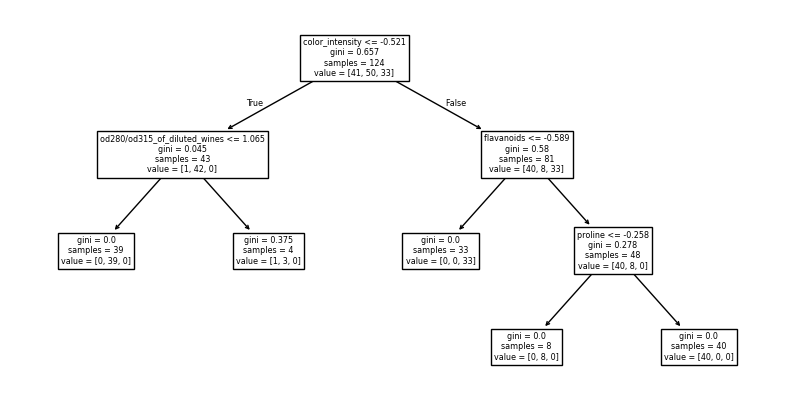

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(dt, feature_names=dt.feature_names_in_)
plt.show()

#### 8. AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3))

param_grid = {
    'n_estimators' : np.arange(50, 501, 50),
    'learning_rate' : np.arange(0.1, 5.01, 0.1),
}

search = GridSearchCV(adaboost, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'learning_rate': np.float64(0.1), 'n_estimators': np.int64(50)}

In [42]:
adaboost = AdaBoostClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, adaboost.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, adaboost.predict(X_test))}')

Accuracy train 0.967741935483871
Accuracy test 0.9259259259259259


#### 9. Bagging

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bagging = BaggingClassifier(n_jobs=-1)

param_grid = {
    'n_estimators' : np.arange(10, 220, 10),
    'max_samples' : [0.5, 0.75, 1],
    'max_features' : [0.5, 0.75, 1]
}
search = GridSearchCV(bagging, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 189 candidates, totalling 567 fits


{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': np.int64(50)}

In [45]:
bagging = BaggingClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, bagging.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, bagging.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 10. GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gradient_boosting = GradientBoostingClassifier()

param_grid = {
    'loss' : ['log_loss'],
    'learning_rate' : np.arange(0.1, 3.01, 0.5),
    'n_estimators' : np.arange(100, 501, 100),
    'subsample' : [0.5, 0.75, 1],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : np.arange(1, 3)
}

search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'criterion': 'friedman_mse',
 'learning_rate': np.float64(0.6),
 'loss': 'log_loss',
 'max_depth': np.int64(1),
 'n_estimators': np.int64(400),
 'subsample': 0.5}

In [48]:
gradient_boosting = GradientBoostingClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, bagging.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, bagging.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 11. RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators' : np.arange(100, 1001, 100),
    'max_features' : ['sqrt', 'log2']
}

search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_features': 'sqrt', 'n_estimators': np.int64(300)}

In [51]:
rf = RandomForestClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, rf.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


## Бинарная классификация.

In [52]:
df = pd.read_csv('/Users/mishasmacbook/Desktop/HSE/datas/iad/homeworks/hw07/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


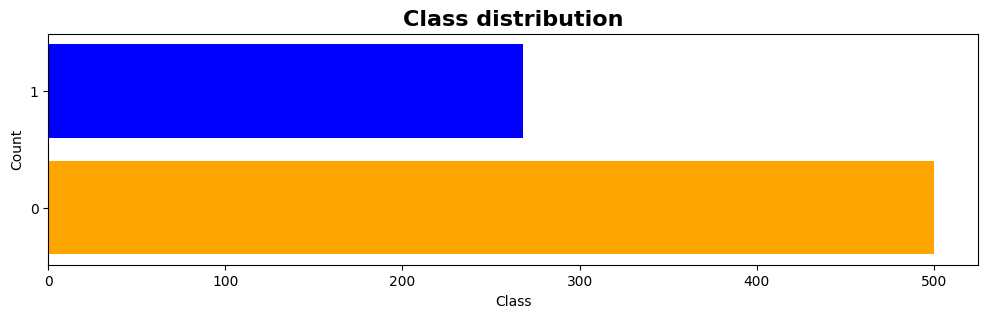

In [53]:
counts = pd.DataFrame(df['Outcome'].value_counts())

plt.figure(figsize=(12, 3))
plt.barh(y=counts.index, width=counts['count'], color=['orange', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.yticks([0, 1])
plt.title('Class distribution', fontweight='bold', fontsize=16)
plt.show()

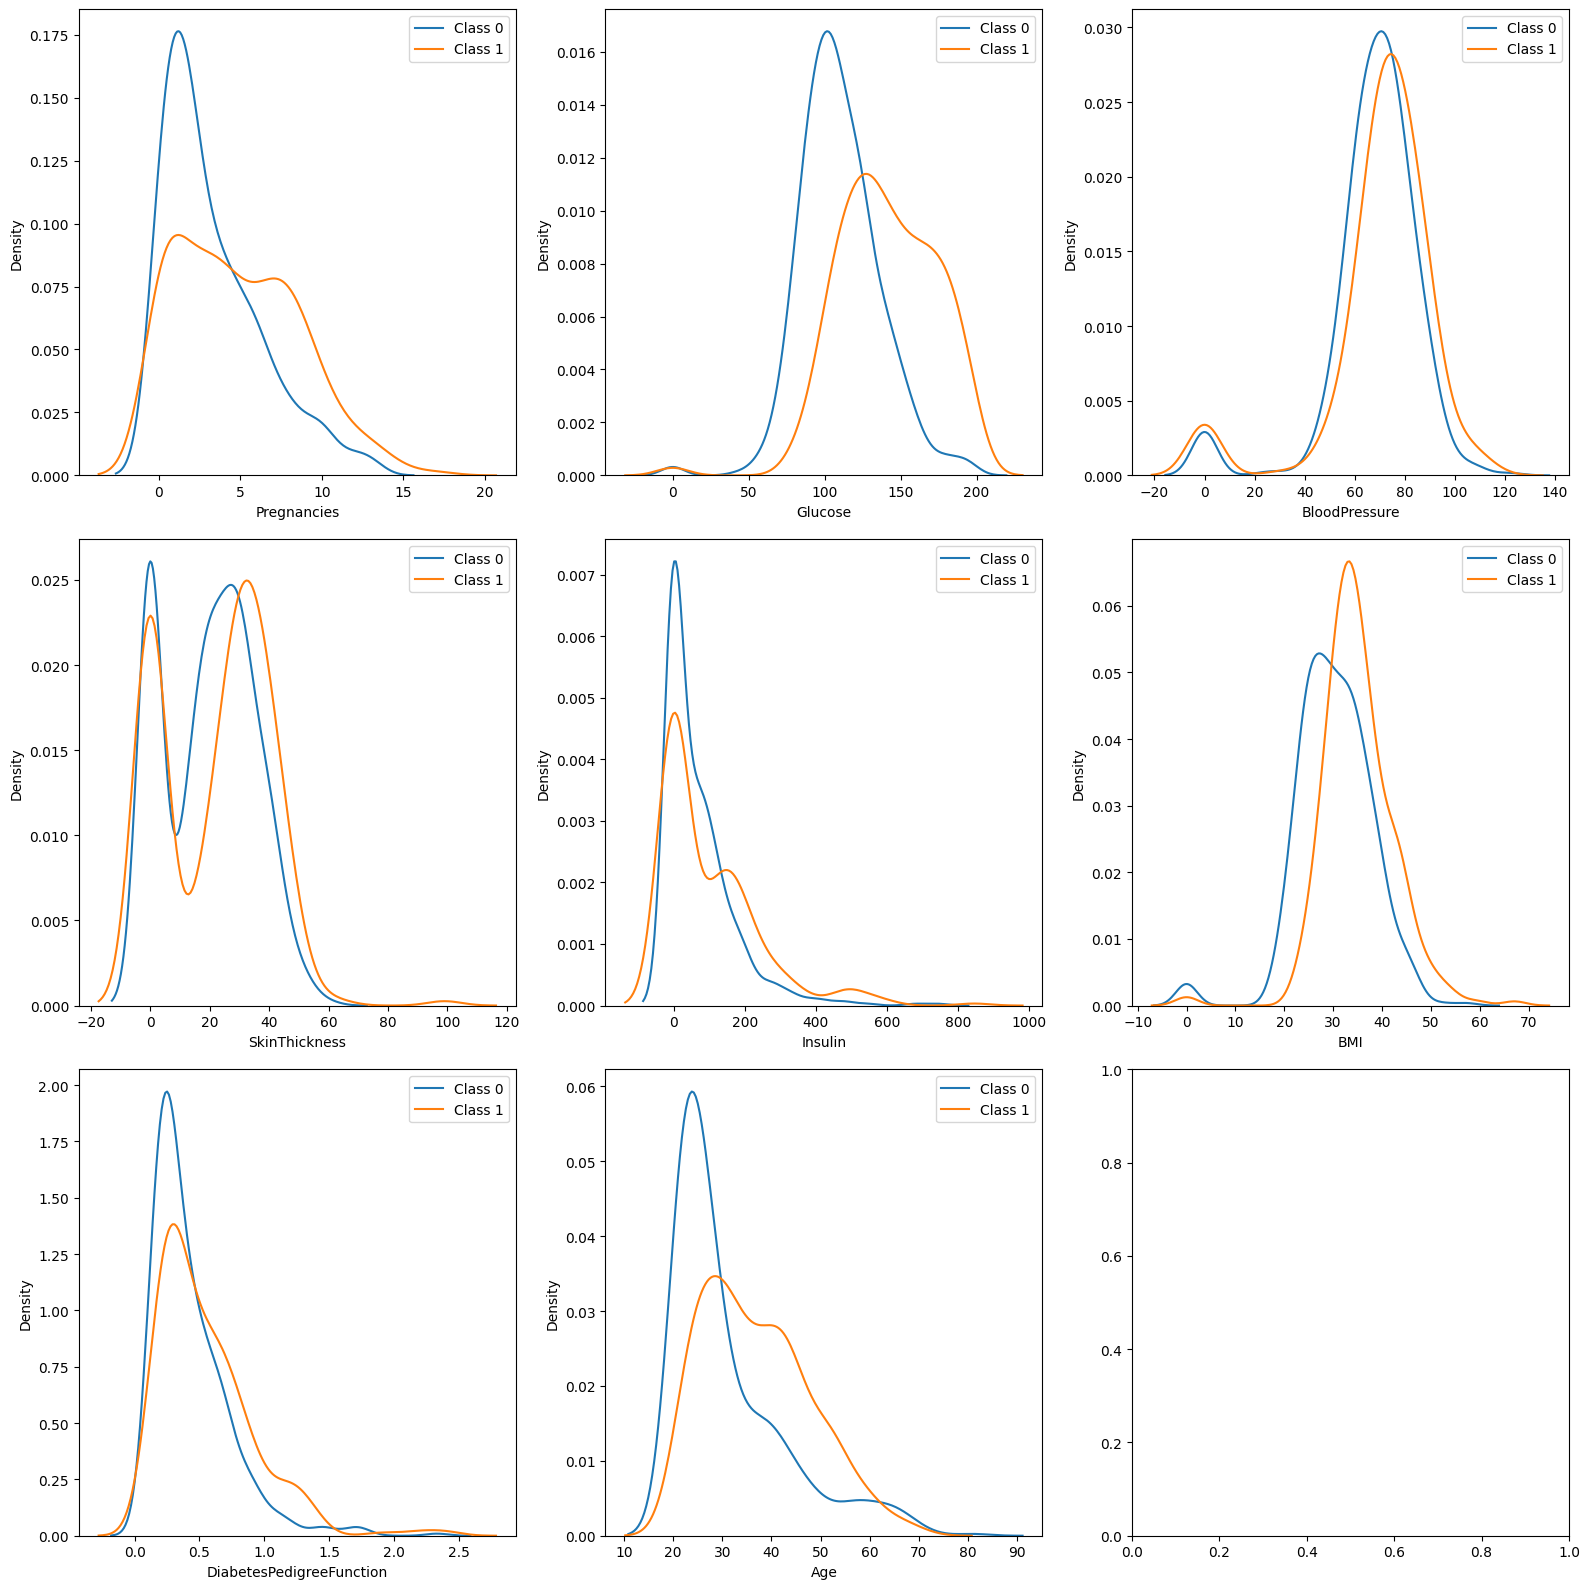

In [54]:
features = df.drop('Outcome', axis=1).columns
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for f, ax in zip(features, axes.flatten()):
    sns.kdeplot(df[df['Outcome'] == 0][f], label='Class 0', ax=ax)
    sns.kdeplot(df[df['Outcome'] == 1][f], label='Class 1', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

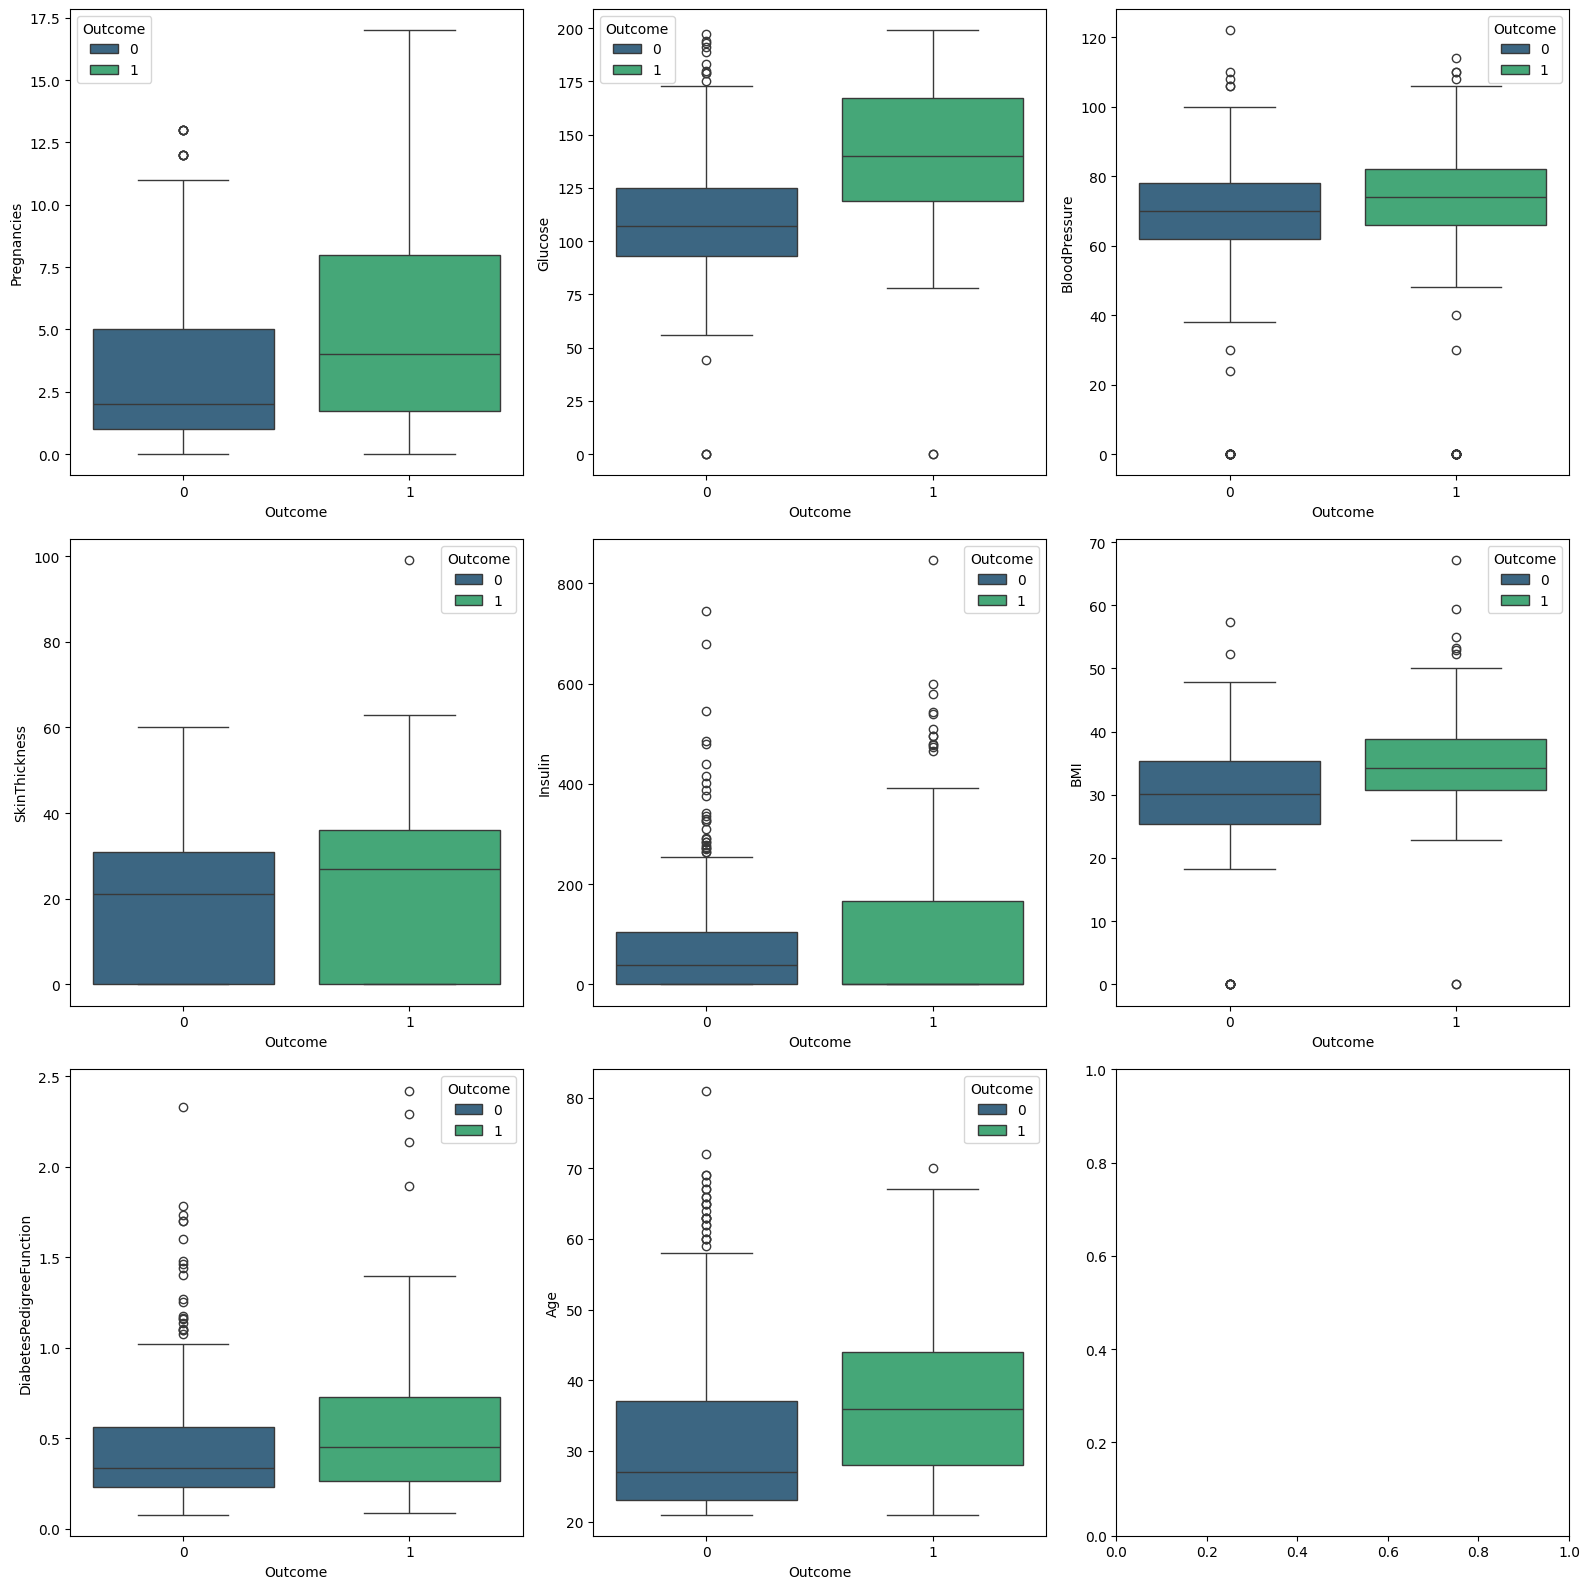

In [55]:
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for f, ax in zip(df.columns[:-1], axes.flatten()):
    sns.boxplot(data=df, x='Outcome', y=f, palette='viridis', ax=ax, hue='Outcome')
plt.tight_layout()
plt.show()

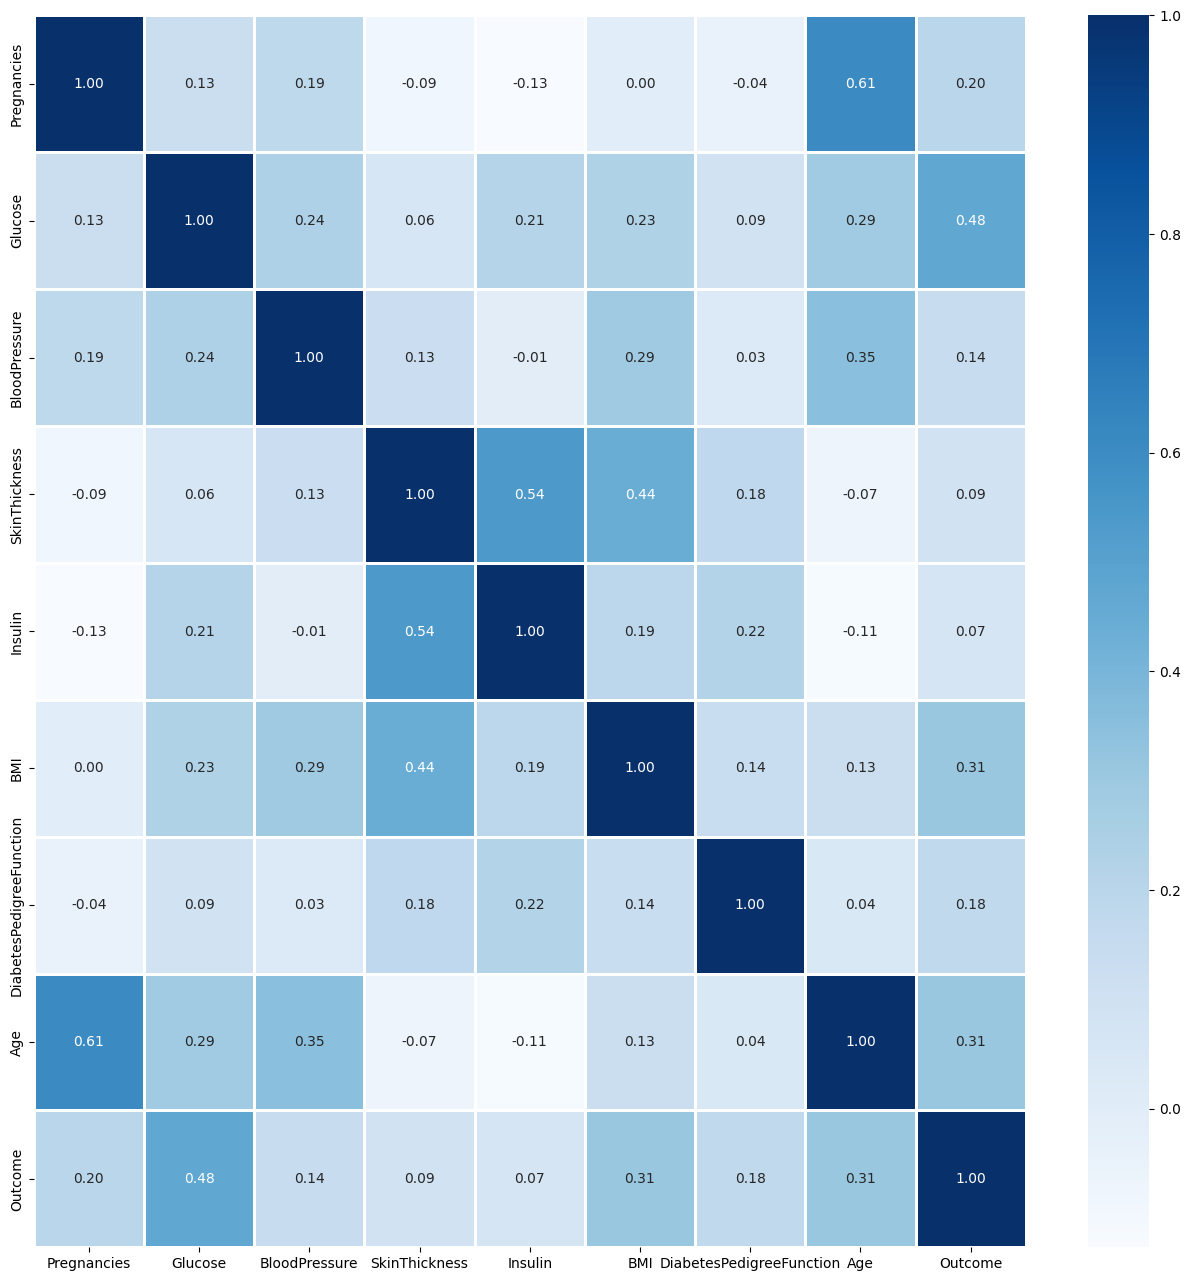

In [56]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.3, stratify=df['Outcome'])

In [58]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [59]:
log_reg = LogisticRegression(penalty='l2', n_jobs=-1).fit(X_train, y_train)

In [60]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [61]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [62]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [63]:
svm = SVC(probability=True).fit(X_train, y_train)

In [64]:
bagging = BaggingClassifier().fit(X_train, y_train)

In [65]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

In [66]:
models = {
    'log reg' : log_reg,
    'knn' : knn,
    'tree' : tree,
    'rf' : rf,
    'smv' : svm,
    'bagging' : bagging,
    'GB' : gb
}

#### Метрики

##### Accuracy

In [67]:
for model in models.keys():
    print(f'Accuracy train {model} {accuracy_score(y_train, models[model].predict(X_train)):.2f}')
    print(f'Accuracy test {model} {accuracy_score(y_test, models[model].predict(X_test)):.2f}')
    print('-----------------------------------')

Accuracy train log reg 0.79
Accuracy test log reg 0.73
-----------------------------------
Accuracy train knn 0.82
Accuracy test knn 0.69
-----------------------------------
Accuracy train tree 1.00
Accuracy test tree 0.67
-----------------------------------
Accuracy train rf 1.00
Accuracy test rf 0.74
-----------------------------------
Accuracy train smv 0.84
Accuracy test smv 0.74
-----------------------------------
Accuracy train bagging 0.99
Accuracy test bagging 0.69
-----------------------------------
Accuracy train GB 0.95
Accuracy test GB 0.71
-----------------------------------


##### F1 Score

In [68]:
from sklearn.metrics import f1_score

for model in models.keys():
    print(f'F1 score train {model} {f1_score(y_train, models[model].predict(X_train)):.2f}')
    print(f'F1 score test {model} {f1_score(y_test, models[model].predict(X_test)):.2f}')
    print('-----------------------------------')

F1 score train log reg 0.66
F1 score test log reg 0.61
-----------------------------------
F1 score train knn 0.71
F1 score test knn 0.53
-----------------------------------
F1 score train tree 1.00
F1 score test tree 0.53
-----------------------------------
F1 score train rf 1.00
F1 score test rf 0.62
-----------------------------------
F1 score train smv 0.73
F1 score test smv 0.60
-----------------------------------
F1 score train bagging 0.98
F1 score test bagging 0.54
-----------------------------------
F1 score train GB 0.92
F1 score test GB 0.60
-----------------------------------


In [69]:
log_reg.classes_

array([0, 1])

##### ROC-curve

In [70]:
from sklearn.metrics import roc_curve, RocCurveDisplay

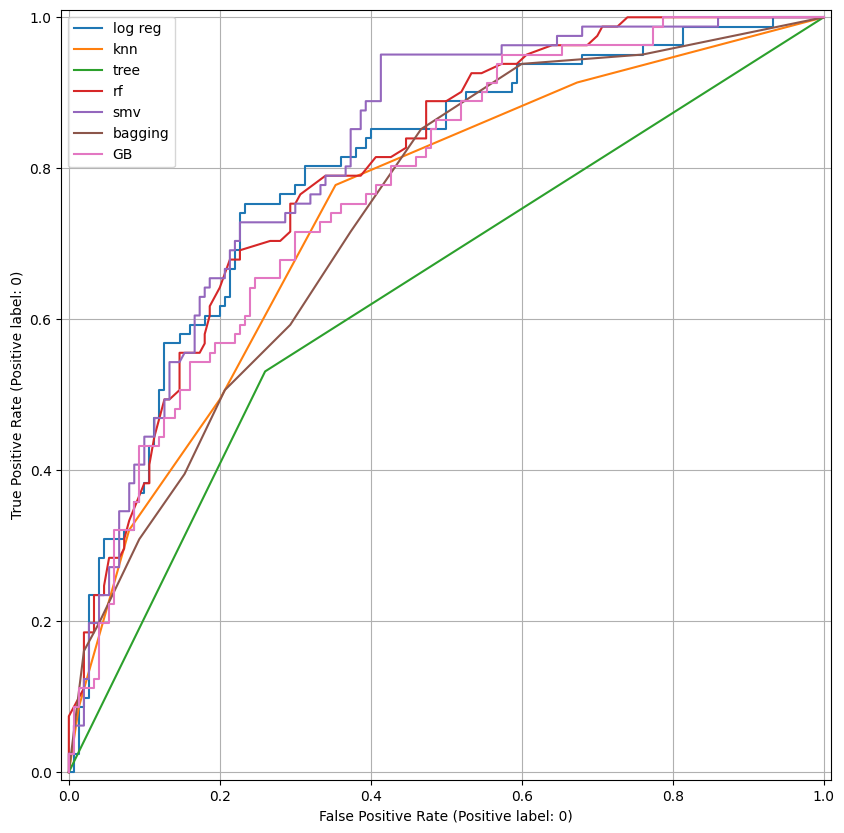

In [71]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
for model in models.keys():
    fpr, tpr, thresholds = roc_curve(y_test, models[model].predict_proba(X_test)[:, 1])
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'{model}', pos_label=log_reg.classes_[0]).plot(ax=ax)
plt.legend()
plt.grid()
plt.show()

##### ROC-AUC

In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
for model in models.keys():
    print(f'ROC-AUC score train {model} {roc_auc_score(y_train, models[model].predict_proba(X_train)[:, 1]):.2f}')
    print(f'ROC-AUC score test {model} {roc_auc_score(y_test, models[model].predict_proba(X_test)[:, 1]):.2f}')
    print('-----------------------------------')

ROC-AUC score train log reg 0.86
ROC-AUC score test log reg 0.80
-----------------------------------
ROC-AUC score train knn 0.91
ROC-AUC score test knn 0.74
-----------------------------------
ROC-AUC score train tree 1.00
ROC-AUC score test tree 0.64
-----------------------------------
ROC-AUC score train rf 1.00
ROC-AUC score test rf 0.80
-----------------------------------
ROC-AUC score train smv 0.90
ROC-AUC score test smv 0.82
-----------------------------------
ROC-AUC score train bagging 1.00
ROC-AUC score test bagging 0.74
-----------------------------------
ROC-AUC score train GB 0.99
ROC-AUC score test GB 0.77
-----------------------------------


##### Precision

In [74]:
from sklearn.metrics import precision_score

In [75]:
for model in models.keys():
    print(f'Precision score train {model} {precision_score(y_train, models[model].predict(X_train)):.2f}')
    print(f'Precision score test {model} {precision_score(y_test, models[model].predict(X_test)):.2f}')
    print('-----------------------------------')

Precision score train log reg 0.74
Precision score test log reg 0.62
-----------------------------------
Precision score train knn 0.80
Precision score test knn 0.57
-----------------------------------
Precision score train tree 1.00
Precision score test tree 0.52
-----------------------------------
Precision score train rf 1.00
Precision score test rf 0.64
-----------------------------------
Precision score train smv 0.85
Precision score test smv 0.67
-----------------------------------
Precision score train bagging 1.00
Precision score test bagging 0.57
-----------------------------------
Precision score train GB 0.98
Precision score test GB 0.58
-----------------------------------


##### Recall

In [76]:
from sklearn.metrics import recall_score

In [77]:
for model in models.keys():
    print(f'Recall score train {model} {recall_score(y_train, models[model].predict(X_train)):.2f}')
    print(f'Recall score test {model} {recall_score(y_test, models[model].predict(X_test)):.2f}')
    print('-----------------------------------')

Recall score train log reg 0.60
Recall score test log reg 0.60
-----------------------------------


Recall score train knn 0.63
Recall score test knn 0.49
-----------------------------------
Recall score train tree 1.00
Recall score test tree 0.53
-----------------------------------
Recall score train rf 1.00
Recall score test rf 0.60
-----------------------------------
Recall score train smv 0.65
Recall score test smv 0.54
-----------------------------------
Recall score train bagging 0.96
Recall score test bagging 0.51
-----------------------------------
Recall score train GB 0.88
Recall score test GB 0.62
-----------------------------------


##### Precision-Recall curve

In [78]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

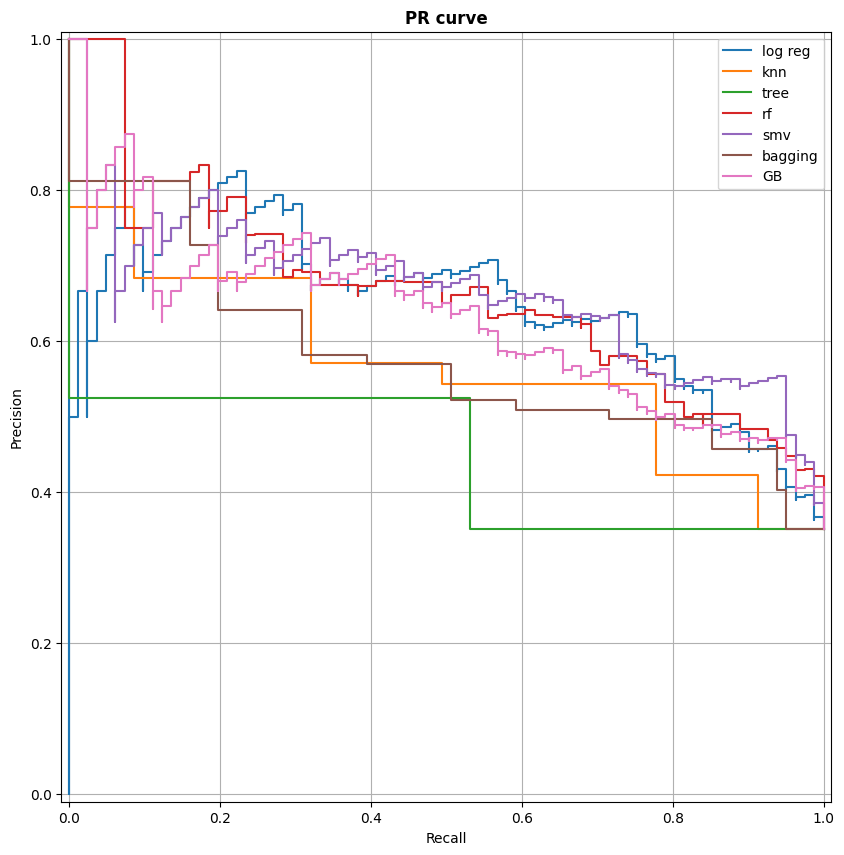

In [79]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
for model in models.keys():
    precision, recall, thresholds = precision_recall_curve(y_test, models[model].predict_proba(X_test)[:, 1])
    PrecisionRecallDisplay(precision, recall).plot(ax=ax, name=f'{model}')
plt.legend()
plt.title('PR curve', fontweight='bold')
plt.grid()
plt.show()

##### Confusion Matrix

In [80]:
from matplotlib import colormaps

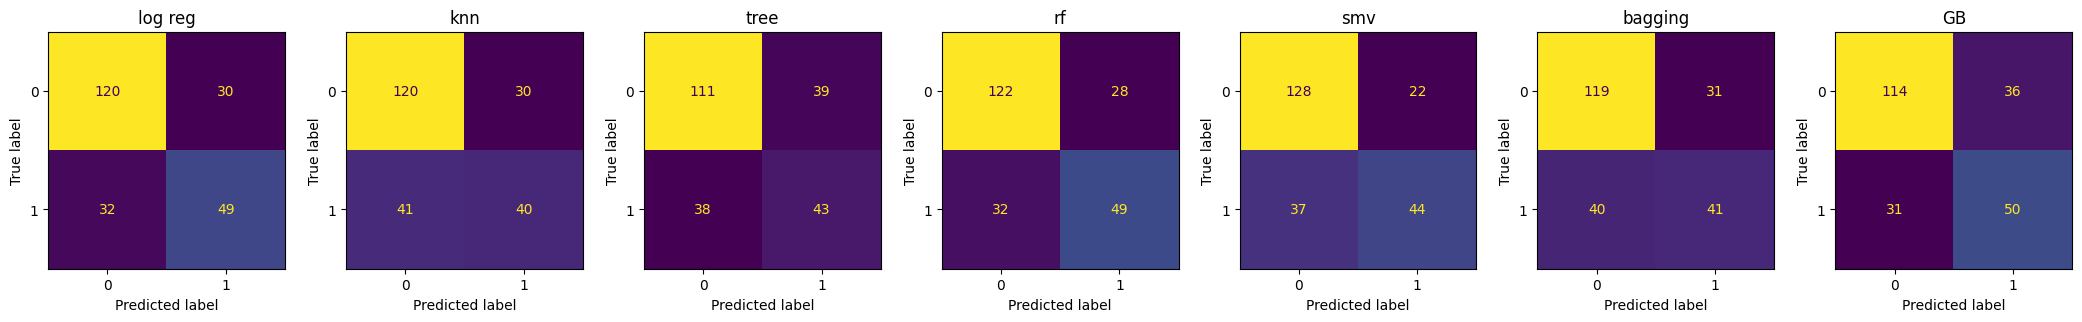

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

_, axes = plt.subplots(1, 7, figsize=(21, 3))
for model, ax in zip(models.keys(), axes.flatten()):
    ConfusionMatrixDisplay(confusion_matrix(y_test, models[model].predict(X_test))).plot(ax=ax, colorbar=False)
    ax.set_title(f'{model}')
plt.tight_layout()
plt.show()

#### Регрессия

In [102]:
df = pd.read_csv('/Users/mishasmacbook/Desktop/HSE/datas/iad/homeworks/hw08/ds_salaries.csv')

In [103]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [104]:
df.drop('salary', axis=1, inplace=True)

In [105]:
cat_features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']

In [106]:
X, y = df.drop('salary_in_usd', axis=1), df['salary_in_usd']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[cat_features])

X_train = pd.concat([X_train.drop(columns=cat_features, axis=1), pd.DataFrame(ohe.transform(X_train[cat_features]), columns=ohe.get_feature_names_out(), index=X_train.index)], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_features, axis=1), pd.DataFrame(ohe.transform(X_test[cat_features]), columns=ohe.get_feature_names_out(), index=X_test.index)], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

Добавим скореры

In [129]:
from sklearn.metrics import make_scorer, check_scoring

scoring = {
    'MSE' : make_scorer(mean_squared_error, response_method='predict'),
    'MAE' : make_scorer(mean_absolute_error, response_method='predict'),
    'MAPE' : make_scorer(mean_absolute_percentage_error, response_method='predict'),
    'RMSE' : make_scorer(root_mean_squared_error, response_method='predict')
}

scoring_call = check_scoring(scoring=scoring, raise_exc=False)

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)	
print(scoring_call(lin_reg, X_train, y_train))
print(scoring_call(lin_reg, X_test, y_test))

{'MSE': 2034068697.6228628, 'MAE': 33280.19776220307, 'MAPE': 0.30587426186229305, 'RMSE': 45100.650745004365}
{'MSE': 2362763354.1799297, 'MAE': 36998.84400307189, 'MAPE': 0.39292411464104476, 'RMSE': 48608.26425804495}


In [134]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)
print(scoring_call(rf, X_train, y_train))
print(scoring_call(rf, X_test, y_test))

{'MSE': 1640046970.062893, 'MAE': 29257.47008143294, 'MAPE': 0.2554347222100917, 'RMSE': 40497.4933799969}
{'MSE': 2266020307.9679074, 'MAE': 35982.04898854468, 'MAPE': 0.3323866229236255, 'RMSE': 47602.734248863344}


In [144]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=10000).fit(X_train, y_train)
print(scoring_call(mlp, X_train, y_train))
print(scoring_call(mlp, X_test, y_test))

{'MSE': 2079064855.4747052, 'MAE': 33640.28152189308, 'MAPE': 0.30965969952354655, 'RMSE': 45596.76365132404}
{'MSE': 2122783707.066376, 'MAE': 35581.424492469356, 'MAPE': 0.3547819832825133, 'RMSE': 46073.67694320018}
